In [1]:
# If you do not already have this package install it by uncommenting the below line:
#pip install scikit-learn-intelex

In [2]:
# pip install --upgrade scikit-learn

In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
# import relevant libraries:
import random
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

In [5]:
############## Importing Dataset ##############
dataset = pd.read_csv('Customer_Churn_Final_Dataset.csv')
dataset.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,8,0,0,150.0,0,2,0,3,1,1
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,7,0,0,80.0,0,2,2,3,0,0
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,0,0,0,130.0,0,5,2,3,1,0
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,8,0,0,150.0,0,2,3,3,1,0
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,0,0,0,30.0,0,5,0,3,1,0


In [6]:
dataset.shape

(6380, 57)

In [7]:
# Separate input features and target:
    
target_variable = dataset["Churn"]
independent_features = dataset.drop(columns="Churn")
independent_features

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,0,8,0,0,150.0,0,2,0,3,1
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,0,7,0,0,80.0,0,2,2,3,0
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,0,0,0,0,130.0,0,5,2,3,1
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,0,8,0,0,150.0,0,2,3,3,1
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,0,0,0,0,30.0,0,5,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,30.48,242.0,40.0,0.50,0.0,0.0,-9.0,0.5,6.0,9.7,...,1,6,0,0,30.0,0,7,3,4,1
6376,66.17,559.0,45.0,0.00,80.0,0.6,548.0,59.3,3.0,1.3,...,0,7,0,0,30.0,0,2,2,3,1
6377,99.61,1147.0,60.0,1.73,101.0,0.0,-414.0,-29.6,19.0,1.3,...,0,8,0,0,100.0,0,5,0,3,1
6378,103.63,891.0,65.0,0.74,125.0,0.2,298.0,75.7,12.0,1.3,...,0,0,0,0,10.0,0,5,2,3,1


In [8]:
X = independent_features
y = target_variable

### Balancing the Imbalanced Data

In [9]:
# As you can clearly see below, the dataset is quite imbalanced:

In [10]:
# The Number of Customer's Churning is very less than the Customer's Churning (more than half a difference)
dataset["Churn"].value_counts()

0    4569
1    1811
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

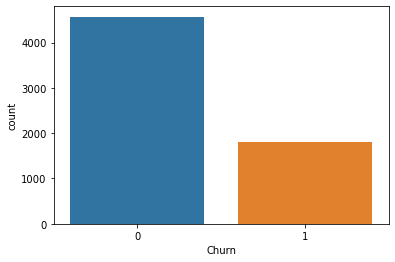

In [11]:
# Target variable distribution is showing that the dataset is imbalanced:
sns.countplot(x=dataset.Churn)

In [12]:
# Building Gaussion Naive Bayes model
model = GaussianNB()

# define resampling
resample = SMOTEENN()
# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10)

In [13]:
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='f1_macro', cv=cv)
# summarize performance
print("F1 Score: %.3f%%" % (scores.mean()*100.0))

F1 Score: 43.020%


In [14]:
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv)
# summarize performance
print("Precision: %.3f%%" % (scores.mean()*100.0))

Precision: 28.981%


In [15]:
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv)
# summarize performance
print("Recall: %.3f%%" % (scores.mean()*100.0))

Recall: 69.277%
